In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

aux = pd.read_csv('temp.csv') 
n = 22

words = aux.drop(aux.columns[0], axis=1) 
words = np.array(words)
words = words[:n,:]

labels = aux.iloc[:n,0] 
labels = np.array(labels)

print (words.shape)
print (labels.shape)

(8, 300)
(8,)


0 necesidad
1 dinero
2 comida
3 manzana
4 sopa
5 tecnologia
6 innovacion
7 alimento


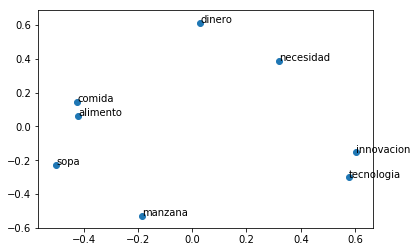

In [7]:
# PCA
from sklearn.decomposition import PCA 
pca = PCA(n_components=2).fit(words) 
X_pca = pca.transform(words)


plt.scatter(X_pca[:, 0], X_pca[:, 1])

for i, txt in enumerate(labels):
    print(i, txt)
    plt.annotate(txt, (X_pca[i,0],X_pca[i,1]))


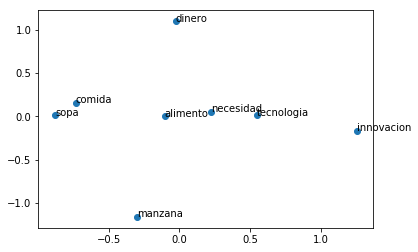

In [8]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors = 5)
iso.fit(words)
X_iso = iso.transform(words)

plt.scatter(X_iso[:, 0], X_iso[:, 1])

for i, txt in enumerate(labels):
    plt.annotate(txt, (X_iso[i,0],X_iso[i,1]))


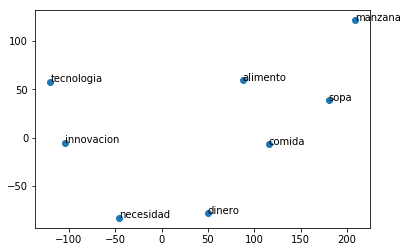

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=4, n_components=2, init='pca', n_iter=2500, random_state=23)

X_projected = tsne.fit_transform(words)

X_projected.shape

plt.scatter(X_projected[:, 0], X_projected[:, 1])

for i, txt in enumerate(labels):
    plt.annotate(txt, (X_projected[i,0],X_projected[i,1]))


[tutorial here](https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne)

# WordEmbeddings with T-SNE

In [81]:
import pandas as pd
import csv
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('prueba.csv', sep=',', quoting=csv.QUOTE_NONE)
data = data.loc[:, ["p1", "p6"]]
print(data.shape)
print(data.head)

#data = ['el hola del planeta tierra', 'soy un alumno ejemplar']


(99, 2)
<bound method NDFrame.head of                                                       p1  \
1000    poner merceria poder ayudar personas comunida...   
10000   crear firma especializada desarrollo mantenim...   
10001   prueba rapida anemia divertida no invasiva fo...   
1001    superdeli crea productos consumo utilizados h...   
10010   restaurante comida tipica consumida diferente...   
10012   camapanas posicionamiento redes sociales busc...   
1002    crear empresa local brinde servicios garantiz...   
10022   prestar servicios profesionales enfermeria li...   
10023   facil rapido eficaz gente viaja gente viaja b...   
10027   utilizando azoteas ciudad mexico vamos reduci...   
10035   poner cocina economica ofrezca oda comida pos...   
10036                             mantener seguro hogar    
10038    deshidratadores solares empezar emprender idea    
10046   cafeteria lugar correcto comunidad relacionen...   
10047   negocio sustentable amigable comunidades arte...   
10

In [82]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    #print (val)
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word) 
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    #data = data.dropna(how="any")
    for col in ['p1', 'p6']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

#print (data.head(1))
temp = clean_dataframe(data)
print(temp.head())


#data = clean_sentence(data[0])

                                                      p1  \
1000    poner merceria poder ayudar personas comunida...   
10000   crear firma especializada desarrollo mantenim...   
10001   prueba rapida anemia divertida invasiva forma...   
1001    superdeli crea productos consumo utilizados h...   
10010   restaurante comida tipica consumida diferente...   

                                                      p6  
1000    poner merceria satisfacer necesidades comunid...  
10000   inmuebles residenciales comerciales industria...  
10001   medsif silbato eficaz invasivo capaz realizar...  
1001    superdeli identificamos problematica analizam...  
10010   idea negocio consta aperturar restaurante com...  


In [87]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['p1', 'p6']:
        for sentence in data[col].iteritems():
            #print(sentence[0])
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]

[['',
  'poner',
  'merceria',
  'poder',
  'ayudar',
  'personas',
  'comunidad',
  'necesitamos',
  'merceria',
  'invertimos',
  'tiempo',
  'ademas',
  'dinero',
  'gustaria',
  'dar',
  'clases',
  'pintura',
  'bordado',
  'buenos',
  'personas',
  'podrian',
  'vender',
  'creaciones',
  'material',
  'merceria',
  'asi',
  'ayuda',
  'mutua',
  'responsabilidad',
  ''],
 ['',
  'crear',
  'firma',
  'especializada',
  'desarrollo',
  'mantenimiento',
  'plataformas',
  'virtuales',
  'enfocadas',
  'ahorro',
  'energia',
  'lograr',
  'convenios',
  'profesionales',
  'experimentados',
  'jovenes',
  'busqueda',
  'espacio',
  'desarrollar',
  'suenos',
  'conocimientos',
  'disenar',
  'protocolos',
  'obtener',
  'proceso',
  'eficiente',
  'levantamiento',
  'servicio',
  'post',
  'venta',
  'mantenimiento',
  'sofware',
  'logrando',
  'situacion',
  'ganar',
  'ganar',
  'todas',
  'partes',
  'involucradas',
  '']]

In [89]:
#vocab = [s.encode('utf-8').split() for s in data]
#print(vocab)

model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=1, workers=4)
model.wv['partes']

array([  5.96800540e-03,   3.21936305e-03,  -5.86099131e-03,
         1.42458221e-03,  -1.44053961e-03,   3.02910572e-04,
         1.66438738e-04,  -1.52360217e-03,   1.51804648e-03,
         4.03673761e-03,  -7.93993752e-03,   1.34830736e-03,
        -6.90551661e-03,   1.15305942e-03,  -6.44053845e-03,
         1.41939241e-03,  -8.00826383e-05,   3.94002447e-04,
         6.73399633e-03,   3.19481455e-03,  -2.08246149e-03,
        -4.90954099e-03,   1.61811686e-03,  -7.43879611e-03,
        -8.62403493e-03,  -1.59778283e-03,  -2.74668564e-03,
         2.93135783e-03,   1.80100743e-03,   2.22826796e-03,
        -3.05336947e-03,  -1.66460464e-03,   6.27038768e-04,
         4.11918620e-03,   1.20716589e-03,  -1.99160795e-03,
         2.17094412e-03,  -5.22270752e-03,   2.93826661e-03,
        -4.23564017e-03,   5.22119086e-03,  -1.01614008e-02,
        -7.00315693e-03,   1.52636389e-03,   5.07749477e-03,
        -5.06777363e-03,   2.23471085e-03,   3.83771281e-03,
         5.82636008e-03,

In [90]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
tsne_plot(model)

In [ ]:
# A more selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

In [ ]:
# A less selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
tsne_plot(model)

In [ ]:
model.most_similar('personas')